In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.tree import DecisionTreeClassifier
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation
from sklearn.ensemble import RandomForestClassifier

In [26]:
data = pd.read_csv("data.csv")
# here header 0 means the 0 th row is our coloumn name
# have a look at the data
#print(data.head(6))# as u can see our data have imported and having 33 columns
# head is used for to see top 5 by default I used 2 so it will print 6 rows
# now lets look at the type of data we have. We can use
data.head(6)
#data.info()
#data.describe() # this will describe the all statistical function of our data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [27]:
# now we can drop this column Unnamed: 32
data.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column
# here you can check the column has been droped
data.columns # this gives the column name which are persent in our data no Unnamed: 32 is not now there

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)
# As I said above the data can be divided into three parts.lets divide the features according to their category
# now as you know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


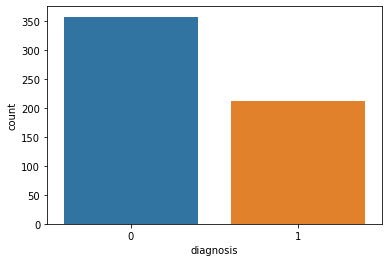

In [29]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")
plt.show()

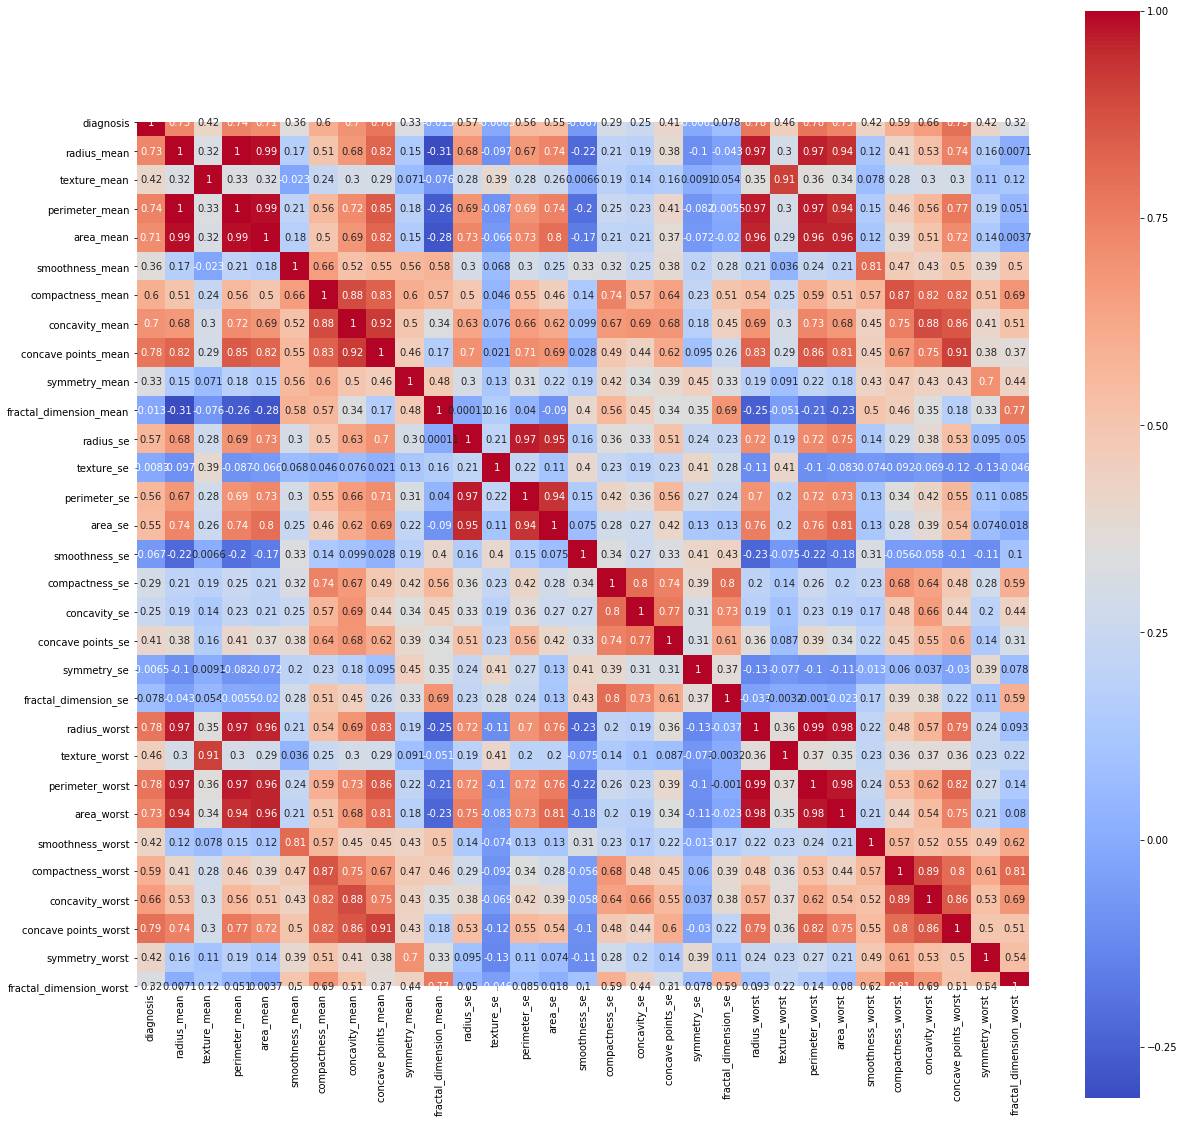

In [30]:
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True, annot = True, square = True,
            cmap= 'coolwarm')
plt.show()

In [31]:
corr = data.corr() 
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [32]:
#Based on corrplot let's select some features for the model ( decision is made in order to remove collinearity)
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean','smoothness_se','concave points_mean']
# now these are the variables which will use for prediction

In [33]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [34]:
train_X = train[prediction_var]# taking the training data input
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [35]:
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.8713450292397661


c:\users\carolina\desktop\ml_edureka\mlenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier(random_state = 6)
#cross_val_score(clf, train_X, train_y, cv=10)
clf_dec.fit(train_X,train_y)
#clf.get_params(deep=True)
# deep=True --> If True, will return the parameters for this estimator and contained subobjects that are estimators. 

#clf.predict(test_X, check_input=True)
#clf.predict_log_proba(test_X)
# check_input --> Allow to bypass several input checking. Don’t use this parameter unless you know what you do.
temp = clf_dec.predict(test_X)
#print(clf.score(test_X,test_y, sample_weight=None))
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.8947368421052632


In [37]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=21)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.8888888888888888


In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(train_X, train_y)
target_pred = y_pred_gnb.predict(test_X)

#cnf_matrix_gnb = confusion_matrix(test_y, y_pred_gnb)
#print(cnf_matrix_gnb)
print(metrics.accuracy_score(y_pred_gnb,test_y)) # to check the accuracy
print("Number of mislabeled points out of a total %d points : %d"
                    %(data.shape[0],(test_y != y_pred_gnb).sum()))
print(metrics.accuracy_score(test_y, target_pred))

TypeError: Expected sequence or array-like, got estimator GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
from sklearn import svm    		# To import the svm classifier
from sklearn.metrics import accuracy_score
# ALL Default hyperparameters
model = svm.SVC(kernel='linear')

#model = svm.SVC(kernel='linear')
model.fit(train_X,train_y)
#Predict Output
predicted= model.predict(test_X)
print("SVM accuray:",accuracy_score(test_y, predicted))

SVM accuray: 0.9298245614035088


In [41]:
print("hhhh")

hhhh
